In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.7.1+cpu'

In [3]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X),len(y)

(50, 50)

### Splitting The Data

In [5]:
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
print(f"{len(X_train)} - {len(y_train)} - {len(X_test)} - {len(y_test)}")

40 - 40 - 10 - 10


### Visualize

In [6]:
def plot_graph(train_data=X_train,
               train_labels=y_train,
               test_data=X_test,
               test_labels=y_test,
               predictions=None):
    
    plt.figure(figsize=(10,7))

    plt.scatter(train_data,train_labels,c='b',s=4,label="Training Data")
    
    plt.scatter(test_data,test_labels,c='g',s=4,label="Testing Data")
    
    if predictions is not None:
        plt.scatter(test_data,predictions,c='r',s=4,label="Predictions Data")

    plt.legend(prop={'size':14})

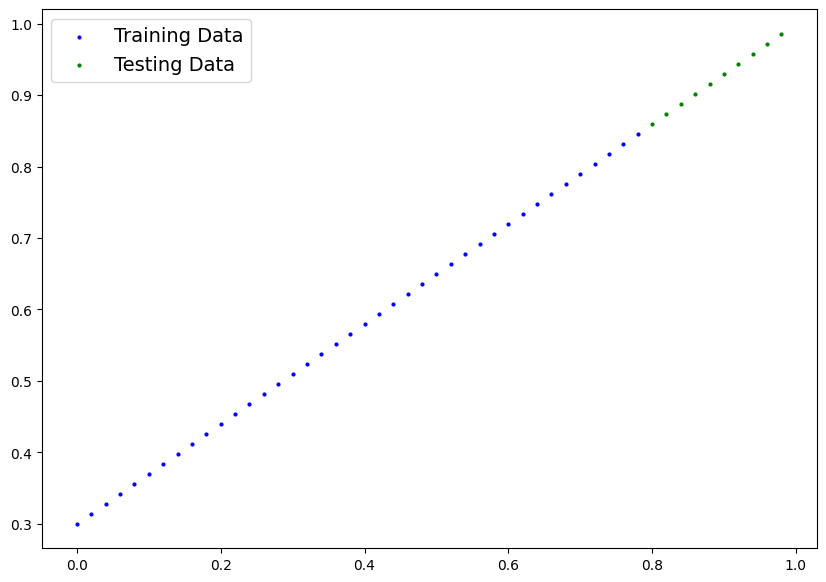

In [7]:
plot_graph()

### Model Building

In [8]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,
                                             dtype=torch.float))
        
    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [9]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making Predictions Using torch.inference_mode()

In [11]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

(tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]),
 None)

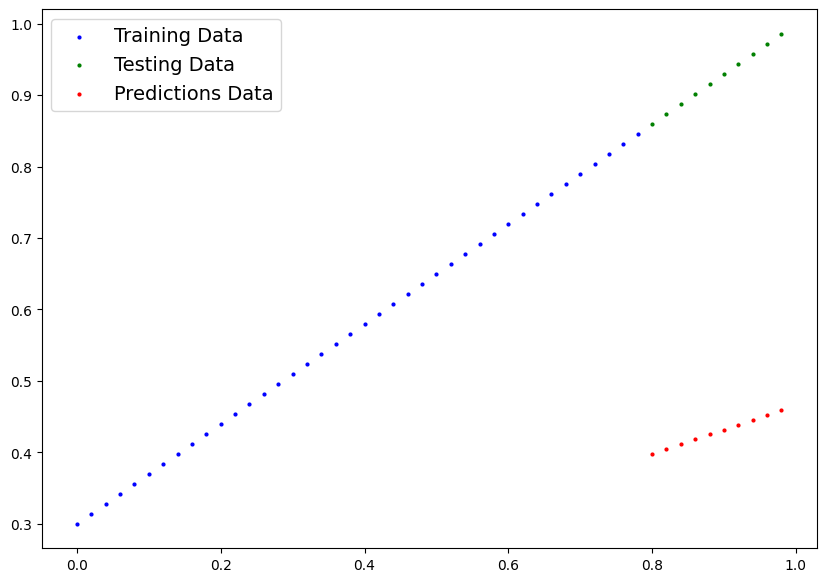

In [12]:
y_test,plot_graph(predictions=y_preds)

### Training The Model

In [13]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [ ]:
torch.manual_seed(42)
###Training Loop
epochs = 196

###Tracking Info

epochs_count = []
loss_count = []
test_loss_count = []

for epoch in range(epochs):
    #Sets the model to training mode 
    model_0.train() #-> train mode in pytorch sets required gradients to require gradients

    # 1.Forward pass
    y_pred = model_0(X_train)

    # 2.Calculate The Loss
    loss = loss_fn(y_pred,y_train)

    # 3.Optimizer Zero Grad
    optimizer.zero_grad()

    # 4. Perform Backpropagation on the loss with respect to the model parameters
    loss.backward()

    # 5.Step the optimizer
    optimizer.step()

    # Testing
    model_0.eval() # -> turns off gradient tracking
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred,y_test)
    
    if epoch % 10 == 0:
        epochs_count.append(epoch)
        loss_count.append(loss)
        test_loss_count.append(test_loss)
        print(f"epoch->{epoch} | Loss->{loss} | Test_Loss->{test_loss}")
        print(model_0.state_dict())

epoch->0 | Loss->0.31288138031959534 | Test_Loss->0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
epoch->10 | Loss->0.1976713240146637 | Test_Loss->0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
epoch->20 | Loss->0.08908725529909134 | Test_Loss->0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
epoch->30 | Loss->0.053148526698350906 | Test_Loss->0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
epoch->40 | Loss->0.04543796554207802 | Test_Loss->0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
epoch->50 | Loss->0.04167863354086876 | Test_Loss->0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
epoch->60 | Loss->0.03818932920694351 | Test_Loss->0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

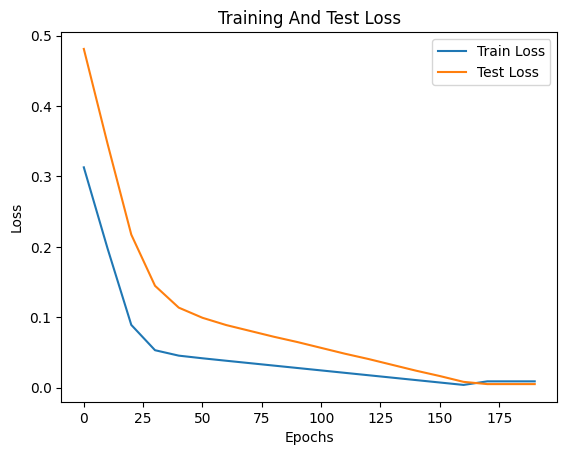

In [15]:
#Plot The Curves
import numpy as np
plt.plot(epochs_count,np.array(torch.tensor(loss_count).numpy()),label="Train Loss")
plt.plot(epochs_count,np.array(torch.tensor(test_loss_count).numpy()),label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training And Test Loss")
plt.legend()

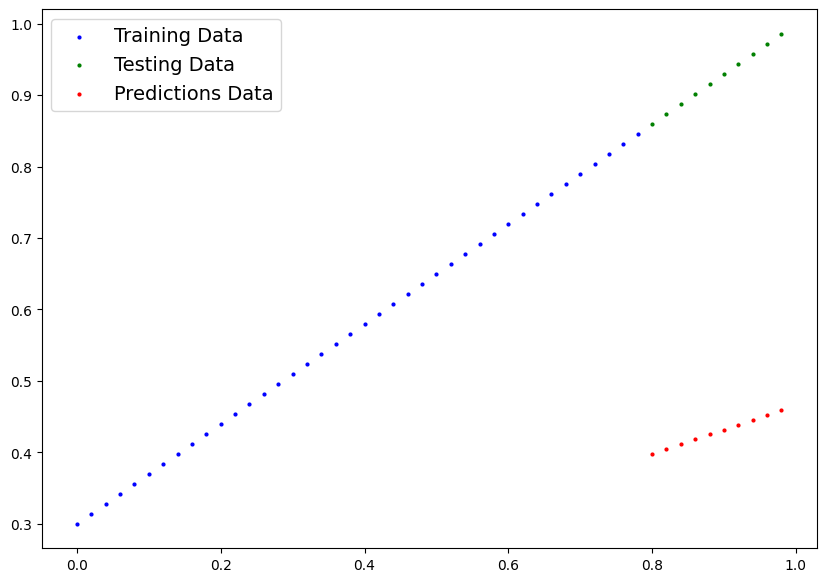

In [16]:
plot_graph(predictions=y_preds)

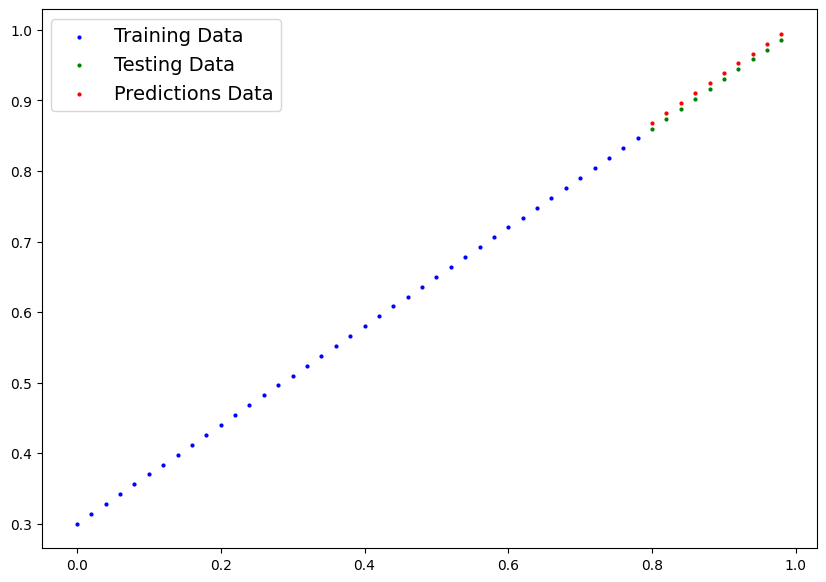

In [17]:
plot_graph(predictions=test_pred)

### Saving Model

In [35]:
#Saving the model
from pathlib import Path

Model_Path = Path("models")
Model_Path.mkdir(parents=True,exist_ok=True)

Model_Name = "LinearRegressionModel.pth"
Model_Save_Path = Model_Path / Model_Name

print(f"Saving Model To {Model_Save_Path}")
torch.save(obj=model_0.state_dict(),f=Model_Save_Path)

Saving Model To models/LinearRegressionModel.pth


In [40]:
# Loading the model
loaded_model = LinearRegressionModel()

In [43]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [42]:
loaded_model.load_state_dict(torch.load(Model_Save_Path))

<All keys matched successfully>

In [44]:
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [48]:
test_pred == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])